#***Temperature EDA***
Daily minimum temperature in Melbourne

Link:
https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

In [63]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#Plot the full time series

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'  # example URL
df = pd.read_csv(url)
df.index
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [66]:
df.columns

Index(['Date', 'Temp'], dtype='object')

In [67]:
df['Date']=pd.to_datetime(df['Date'])

In [68]:
df.info

<bound method DataFrame.info of            Date  Temp
0    1981-01-01  20.7
1    1981-01-02  17.9
2    1981-01-03  18.8
3    1981-01-04  14.6
4    1981-01-05  15.8
...         ...   ...
3645 1990-12-27  14.0
3646 1990-12-28  13.6
3647 1990-12-29  13.5
3648 1990-12-30  15.7
3649 1990-12-31  13.0

[3650 rows x 2 columns]>

In [69]:
df.reset_index()

,index,Date,Temp
0,0,1981-01-01,20.7
1,1,1981-01-02,17.9
2,2,1981-01-03,18.8
3,3,1981-01-04,14.6
4,4,1981-01-05,15.8
...,...,...,...
3645,3645,1990-12-27,14.0
3646,3646,1990-12-28,13.6
3647,3647,1990-12-29,13.5
3648,3648,1990-12-30,15.7


In [70]:
df.set_index('Date', drop=True)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [71]:
df=df.set_index('Date', drop=True)

<Axes: xlabel='Date'>

<Figure size 640x480 with 0 Axes>

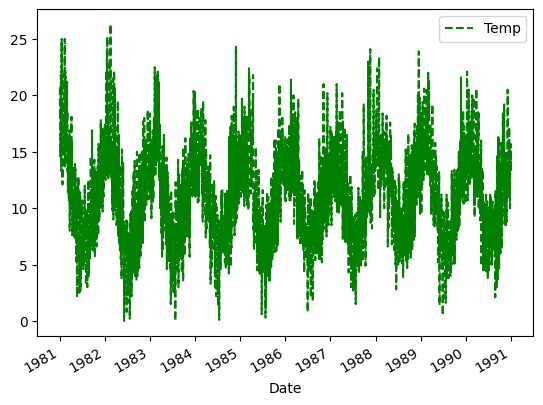

In [72]:
plt.tight_layout()
df.plot(linestyle = '--', color = 'green')
#Since the graph is forecasting, the trend is Stationary.

In [73]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [52]:
df.loc['1981':'1991'].head()

,Date,Temp
1981,1986-06-06,10.6
1982,1986-06-07,9.4
1983,1986-06-08,10.0
1984,1986-06-09,9.6
1985,1986-06-10,9.5


In [74]:
#Datetime Index
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [77]:
datetime.now()

datetime.datetime(2025, 6, 25, 6, 34, 58, 109753)

#Check trends, seasonality(monthly/yearly) & patterns.

In [78]:
#A = Annual
df.resample(rule = 'A').min()


/tmp/ipython-input-78-1790278909.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule = 'A').min()


,Temp
Date,
1981-12-31,2.1
1982-12-31,0.0
1983-12-31,0.0
1984-12-31,0.1
1985-12-31,0.3
1986-12-31,0.8
1987-12-31,1.5
1988-12-31,2.8
1989-12-31,0.5


In [79]:
#Q = Quaterly
df.resample(rule = 'Q').min()

,Temp
Date,
1981-03-31,8.0
1981-06-30,2.1
1981-09-30,3.0
1981-12-31,5.6
1982-03-31,9.0
1982-06-30,0.0
1982-09-30,0.2
1982-12-31,4.7
1983-03-31,9.1


In [81]:
#M = "Monthly"
df.resample(rule = 'M').max()

/tmp/ipython-input-81-1974162852.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample(rule = 'M').max()


,Temp
Date,
1981-01-31,25.0
1981-02-28,25.0
1981-03-31,18.6
1981-04-30,18.1
1981-05-31,14.0
...,...
1990-08-31,11.6
1990-09-30,16.3
1990-10-31,18.4


In [82]:
#QS = "Quarter start"
df.resample(rule = 'QS').min()

,Temp
Date,
1981-01-01,8.0
1981-04-01,2.1
1981-07-01,3.0
1981-10-01,5.6
1982-01-01,9.0
1982-04-01,0.0
1982-07-01,0.2
1982-10-01,4.7
1983-01-01,9.1


<Axes: xlabel='Date'>

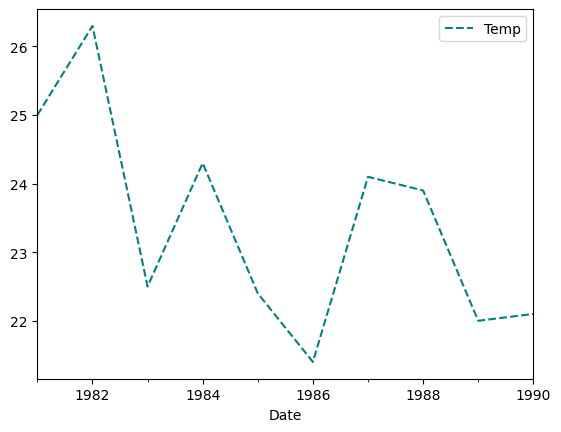

In [88]:
df.resample(rule = 'A').max().plot(linestyle = '--', color = 'teal')

/tmp/ipython-input-89-56872826.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule = 'A').min().plot(linestyle = '--', color = 'teal')


<Axes: xlabel='Date'>

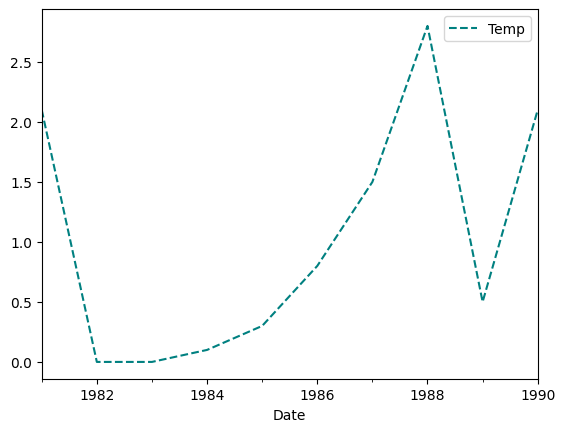

In [89]:
df.resample(rule = 'A').min().plot(linestyle = '--', color = 'teal')

/tmp/ipython-input-84-3136809190.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample(rule = 'M').min().plot(linestyle = '-.', color = 'red')


<Axes: xlabel='Date'>

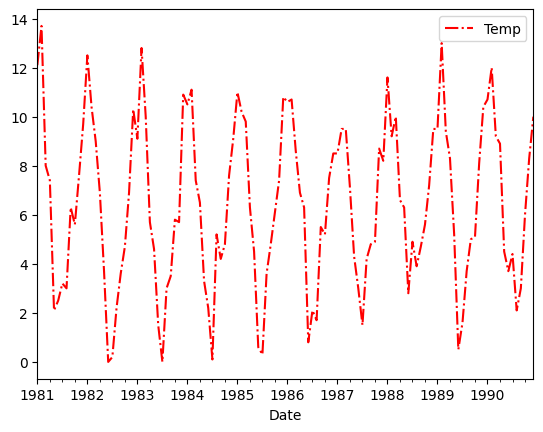

In [84]:
df.resample(rule = 'M').min().plot(linestyle = '-.', color = 'red')

/tmp/ipython-input-102-375643309.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample(rule = 'M').max().plot(kind = 'bar', linestyle = '-.', color = 'red')


<Axes: xlabel='Date'>

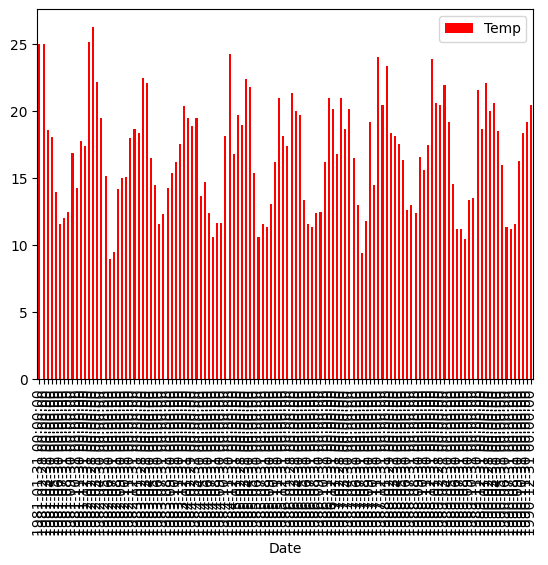

In [102]:
df.resample(rule = 'M').max().plot(kind = 'bar', linestyle = '-.', color = 'red')

/tmp/ipython-input-86-952715815.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.resample(rule = 'Q').max().plot(linestyle = ':', color = 'purple')


<Axes: xlabel='Date'>

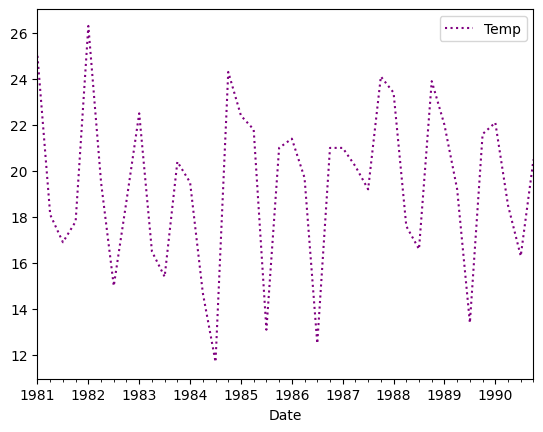

In [86]:
df.resample(rule = 'Q').max().plot(linestyle = ':', color = 'purple')

/tmp/ipython-input-87-497157137.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df.resample(rule = 'Q').min().plot(linestyle = ':', color = 'purple')


<Axes: xlabel='Date'>

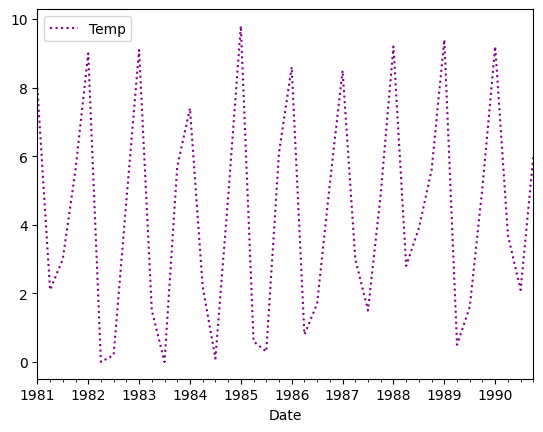

In [87]:
df.resample(rule = 'Q').min().plot(linestyle = ':', color = 'purple')

<Axes: xlabel='Date'>

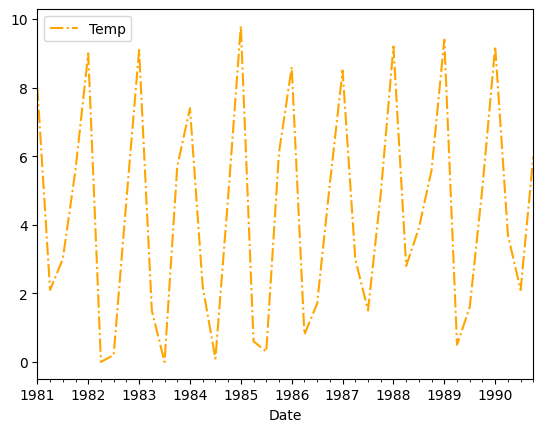

In [96]:
df.resample(rule = 'QS').min().plot(linestyle = '-.', color = 'orange')

<Axes: xlabel='Date'>

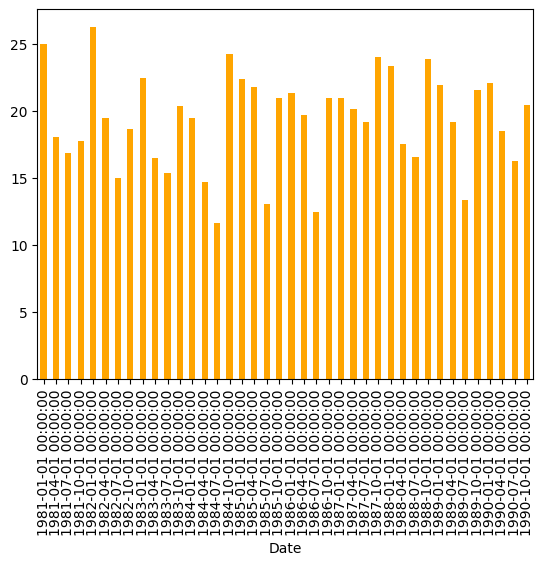

In [101]:
df.resample(rule = 'QS').max()['Temp'].plot(kind = 'bar', linestyle = '-.', color = 'orange')

<Axes: xlabel='Date'>

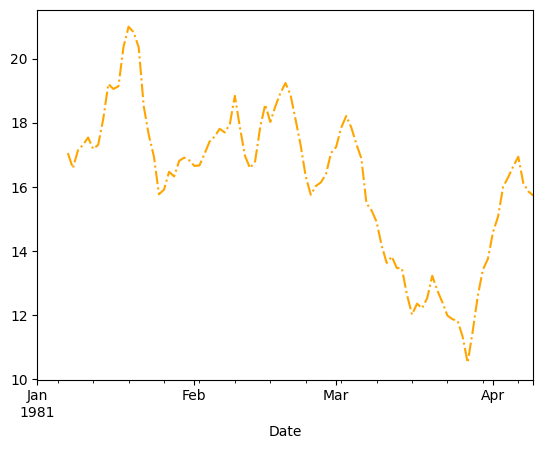

In [120]:
df['Temp'].rolling(7).mean().head(99).plot(linestyle = '-.', color = 'orange')

In [140]:
df['Temp: 10 days rolling'] = df['Temp'].rolling(10).mean()

<Axes: xlabel='Date'>

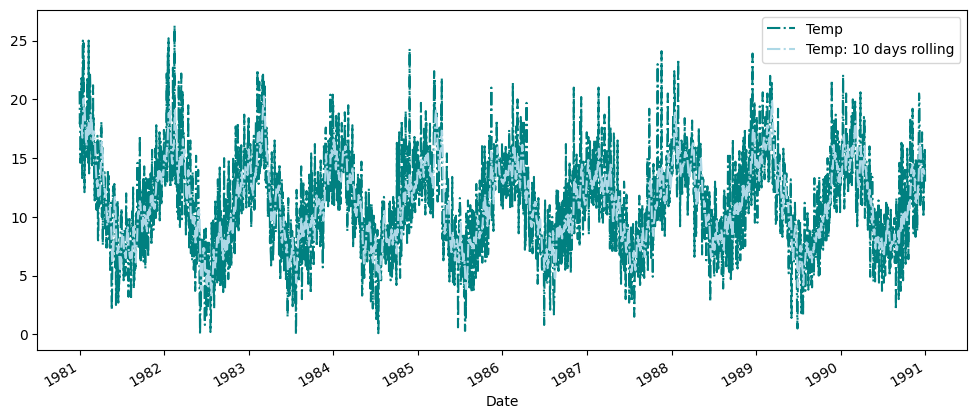

In [157]:
df[['Temp','Temp: 10 days rolling']].plot(kind = 'line', linestyle = '-.', figsize=(12,5), color = ['teal' , 'lightblue'])

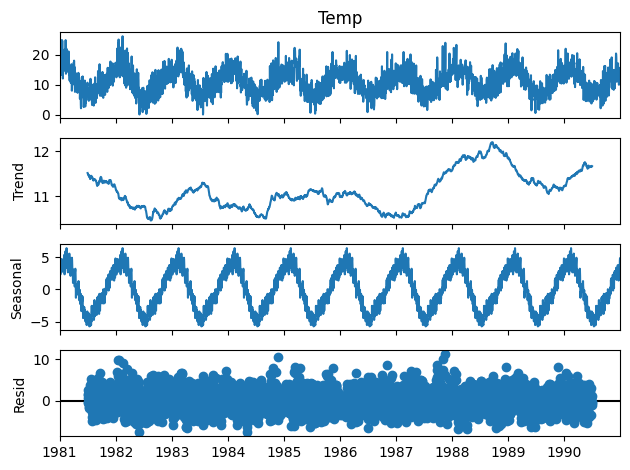

In [166]:
#Decompose the series using statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Temp'], model='additive', period=365)
result.plot()
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

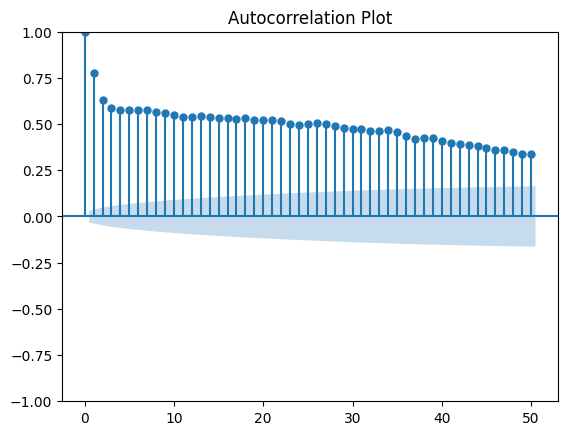

In [170]:
#Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf #(acf = auto correlation function)

plt.figure(figsize=(10, 5))
plot_acf(df['Temp'], lags=50)
plt.title("Autocorrelation Plot")
plt.show()

# **Summary of Insights**

1. Strong seasonal effect: Every year a patern is followed. We can easily differ between summers and winters!

2. From 1981 to around 1985, the temperature slightly decreased.

3. From Autocorrelation, we can see that the data has memory and its not so random, hence good for forecasting.

In [43]:
df = df.set_index('Date')
df

KeyError: "None of ['Date'] are in the columns"

In [ ]:
df.head()

In [ ]:
df.plot(kind = 'bar')